In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [99]:
import os
path = os.path.join(os.getcwd(),"data" ,"ex2data1.txt")
data = pd.read_csv(path, header = None, names = ["Exam1",
                                                "Exam2",
                                                "Admitted"])
data.sample(frac = 4/100, random_state = 65)

,Exam1,Exam2,Admitted
37,64.176989,80.908061,1
81,94.834507,45.694307,1
39,34.183640,75.237720,0
61,35.286113,47.020514,0


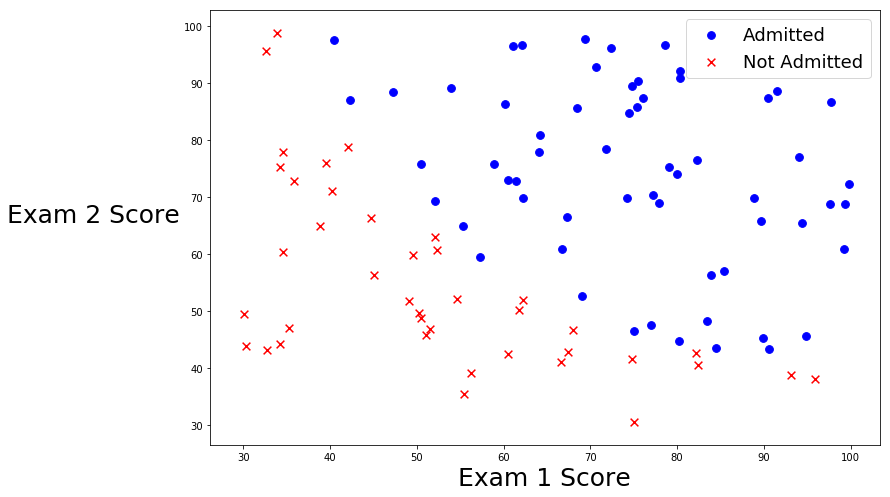

In [100]:
positive = data[data["Admitted"]==1]
negative = data[data["Admitted"]==0]

plt.figure(figsize = (12,8))
plt.scatter(positive['Exam1'], positive["Exam2"],
           s = 60, marker = "o", label = "Admitted",
           alpha = 1, c ="b")
plt.scatter(negative["Exam1"], negative["Exam2"],
           s = 60, marker = "x", label = "Not Admitted",
           alpha = 1, c = 'r')
plt.xlabel("Exam 1 Score", fontsize = 25)
plt.ylabel("Exam 2 Score", rotation = 0, fontsize = 25,
          ha = "right")
plt.legend(fontsize = 18)


sigmoid function,
cost function,
ready ,
theta,
gradient descent

## Sigmoid/Logistic Function: 
# $\frac{1}{1 + e^{-\theta^T.X}}$

In [101]:
def sigmoid(z): 
    return 1/(1 + np.exp(-z))

Making Sure that the Sigmoid function is working well. 

[-10, 10, -0.1, 1.1]

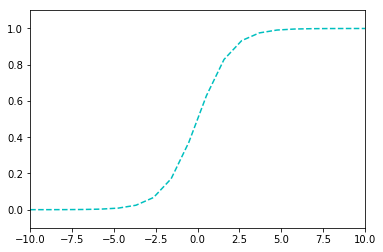

In [102]:
sample_z = np.linspace(-10,10,20)
g_z = sigmoid(sample_z)
plt.plot(sample_z, g_z, "c--")
plt.axis([-10,10,-0.1,1.1])

## Cost Function For Logistic Regression:
### $-\frac{1}{m}\sum_{i=1}^m y^ilog(\frac{1}{1 + e^{-\theta^T.x^i}}) - (1 - y^i)(log(1 - (\frac{1}{1 + e^{-\theta^T.x^i}})) $

In [103]:
x1x2 = data.iloc[:,:2].values
x0 = np.ones(len(x1x2))
X = np.c_[x0, x1x2]
pd.DataFrame(X, columns = ["x0", "Exam1", "Exam2"]).sample(
    frac= 4/100, random_state = 65)

,x0,Exam1,Exam2
37,1.0,64.176989,80.908061
81,1.0,94.834507,45.694307
39,1.0,34.183640,75.237720
61,1.0,35.286113,47.020514


In [104]:
y = data.iloc[:,2].values.reshape(-1,1)
X.shape, y.shape

((100, 3), (100, 1))

In [105]:
# Intializing Theta: 
theta = np.zeros((1,3))
theta

array([[ 0.,  0.,  0.]])

In [106]:
"""
sample_z = X.dot(theta.T)
sample_z.shape
"""
# >> (100,1)

'\nsample_z = X.dot(theta.T)\nsample_z.shape\n'

In [107]:
"""
sample_g_z = sigmoid(sample_z)
sample_g_z.shape
"""
# >> (100, 1)

'\nsample_g_z = sigmoid(sample_z)\nsample_g_z.shape\n'

In [108]:
# Checking if cost function is working right: 
# theta = np.array([-25.87355624,0.21193682,0.20722586])

In [109]:
# Proving that np.mulitply is the same as using *
t = np.arange(100).reshape(-1,1)
u = np.arange(100).reshape(-1,1)
(t*u == np.multiply(t,u)).all()

True

In [110]:
def Cost(X, y, theta):
    m = len(X)
    z = X.dot(theta.T)
    g_z = sigmoid(z).reshape(-1,1)
    g_z.shape
    term1 = -y*(np.log(g_z))
    # pd.DataFrame(np.c_[term1,y]).sample(frac = 4/100, random_state = 65)
    term2 = (1 - y)*(np.log(1 - g_z))
    # pd.DataFrame(np.c_[term2,y]).sample(frac = 4/100, random_state = 65)
    cost = np.sum(term1 - term2)/m
    return cost


In [111]:
# See whether cost function wors right with optimal
# parameters: 
Cost(X, y, np.array([-25.87355624, 0.21193682, 0.20722586]))

0.20357134412017033

## Gradient Descent Steps: 
# $\theta_j := \theta_j - \eta*\sum_{i=1}^m(\frac{1}{1 + e^{-\theta^T.x^i}} - y^i).x_j^i $

In [112]:
z = X.dot(theta.T)
g_z = sigmoid(z)
g_z.shape

(100, 1)

In [113]:
X.shape

(100, 3)

In [114]:
np.multiply((g_z - y),X)

array([[  0.5       ,  17.31182981,  39.01234641],
       [  0.5       ,  15.14335538,  21.94749876],
       [  0.5       ,  17.92370438,  36.45109901],
       [ -0.5       , -30.09129969, -43.15427605],
       [ -0.5       , -39.51636803, -37.67218822],
       [  0.5       ,  22.54163874,  28.15818589],
       [ -0.5       , -30.55333227, -48.25571294],
       [ -0.5       , -37.51237278, -23.27700677],
       [ -0.5       , -38.04939335, -43.71028486],
       [ -0.5       , -42.21640998, -21.76669666],
       [  0.5       ,  47.93077754,  19.11263903],
       [  0.5       ,  37.50682919,  15.30163162],
       [ -0.5       , -41.15352669, -38.24098165],
       [ -0.5       , -34.68229438, -48.85934598],
       [  0.5       ,  19.76916957,  38.01840543],
       [ -0.5       , -26.98552607, -44.60367507],
       [ -0.5       , -34.53507203, -26.37023487],
       [  0.5       ,  33.97342774,  23.33928705],
       [ -0.5       , -35.33075478, -46.46356895],
       [ -0.5       , -38.48939

In [15]:
def gradientDescent(X,y, theta, eta, iters):
    error_list = []
    
    for i in range(iters):
        # Calculate decision_scores 
        z = X.dot(theta.T)
        # >> (100,1) array of decision scores,
        # one for each instance.
        
        # Calcuate activation
        g_z = sigmoid(z)
        g_z.shape
        # >> (100,1) array of activation values, 
        # one for each instance. 
        
        # Calculate Cost
        error = Cost(X, y, theta)
        # and append it to the list of errors 
        error_list.append(error)
        
        # Multiply error with each x_i^j 
        # ∑(y^ - y).x_j^i
        term = np.sum(np.multiply((g_z - y),X), axis = 0)
        # >> (3)
        
        # Weight Update
        theta = theta - (eta*term)
    return error_list, theta

In [16]:
X.shape, y.shape, theta.shape, 

((100, 3), (100, 1), (1, 3))

In [17]:
# Normalizing features:
X[:,1] = (X[:,1] - X[:,1].mean())/ X[:,1].std()
X[:,2] = (X[:,2] - X[:,2].mean())/ X[:,2].std()

In [18]:
error_list, theta = gradientDescent(X,y,theta, eta = 0.01, iters = 1000)

In [19]:
len(error_list)

1000

In [20]:
theta

array([[ 1.71671348,  3.98908079,  3.72154954]])

In [21]:
error_list[-1]

0.20349778840675828

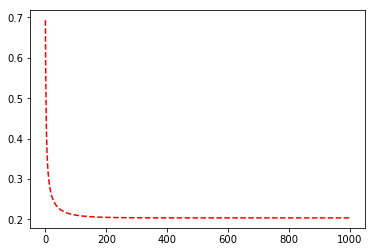

In [22]:
plt.plot(list(range(1000)), error_list, "r--")

In [23]:
def predict(theta, X):
    z  = X.dot(theta.T)
    g_z = sigmoid(z)
    pred = []
    for prob in g_z: 
        if prob >= 0.5:
            pred.append(1)
        else:
            pred.append(0)
    return np.array(pred)


In [24]:
pd.DataFrame(np.c_[predict(theta, X), y]).sample(
frac = 50/100, random_state = 65)
# Seems to do well on the samples 

,0,1
37,1,1
81,1,1
39,0,0
61,0,0
76,1,1
90,1,1
27,1,0
86,0,0
28,0,0
69,1,1


In [25]:
y_pred = np.array(predict(theta, X)).reshape(100,1)
acc = np.sum((y_pred == y).astype(np.int64))/len(y)
acc

0.89000000000000001

Our logistic regression classifier correctly predicted if a student was admitted or not 89% of the time. 
Not bad! 
Keep in mind that this is a training set accuracy thoguh, we did not keep a hold-out set or use cross validation to get a true approximation of the accuracy so this number is likely higher than its true performance. 


In [26]:
data["Exam1"].std(), data["Exam1"].mean(),  data["Exam1"].min(),  data["Exam1"].max()

(19.458222275425072, 65.644274057323145, 30.05882244669796, 99.827857796921279)

In [27]:
x1 = np.linspace(X[:,1].min(), X[:,1].max(), len(X))
# Unscaling the features x1 for visualisations
x1_scaled = (x1*data["Exam1"].std()) + data["Exam1"].mean()
x1_scaled.std(), x1_scaled.mean(), x1_scaled.min(), x1_scaled.max()

(20.445493022505385,
 64.939808946133596,
 29.879549515567994,
 100.00006837669918)

In [28]:
theta

array([[ 1.71671348,  3.98908079,  3.72154954]])

In [29]:
x0 = np.ones(len(X))

In [30]:
data["Exam2"].std(), data["Exam2"].mean(),  data["Exam2"].min(),  data["Exam2"].max()

(18.582783039307344, 66.221998088116948, 30.60326323428011, 98.869435742206122)

# Finding values of x2 where z = 0 

In [31]:
x2 = (- theta[0][0]*x0 - theta[0][1]*x1)/theta[0][2]
# The aboe thetas were for the scaled values, that is why
# x2 is used. Not x1_scaled. 
# Converting x2 back to its scaled version and confirming
# if the scaled versions std, mean, min, max is similar to 
# the orginal x2's. 
x2_scaled = (x2*data["Exam2"].std()) + data["Exam2"].mean()
x2_scaled.std(), x2_scaled.mean(), x2_scaled.min(), x2_scaled.max()

(20.929276261099684, 58.371080863170185, 22.48122217400001, 94.260939552340346)

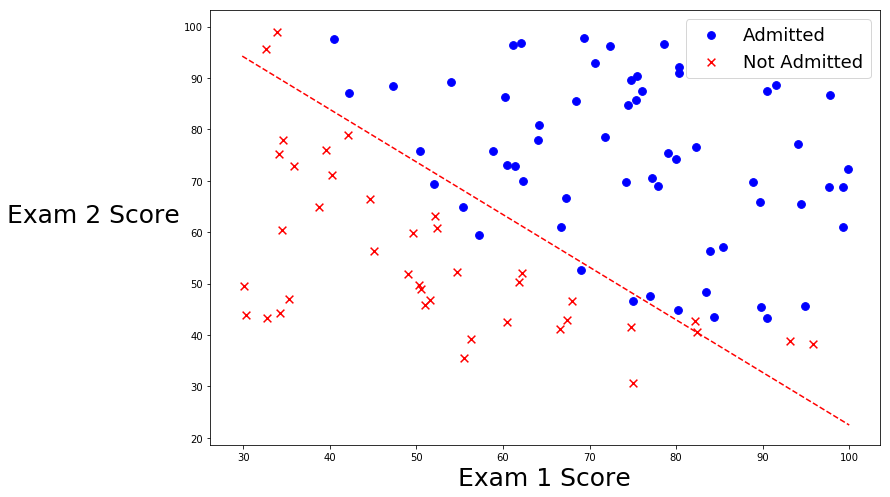

In [32]:
positive = data[data["Admitted"]==1]
negative = data[data["Admitted"]==0]

plt.figure(figsize = (12,8))
plt.scatter(positive['Exam1'], positive["Exam2"],
           s = 60, marker = "o", label = "Admitted",
           alpha = 1, c ="b")
plt.scatter(negative["Exam1"], negative["Exam2"],
           s = 60, marker = "x", label = "Not Admitted",
           alpha = 1, c = 'r')
plt.plot(x1_scaled, x2_scaled, "r--")
plt.xlabel("Exam 1 Score", fontsize = 25)
plt.ylabel("Exam 2 Score", rotation = 0, fontsize = 25,
          ha = "right")
plt.legend(fontsize = 18)


# Doing the same in Sklearn, gives the same accuracy and almost same decision boundary. 

In [33]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X,y.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [34]:
log_reg.coef_

array([[ 0.47300306,  2.25852447,  2.06417755]])

In [35]:
theta = log_reg.coef_

In [36]:
# Finding the x2's according to new theta parameters: 
x2 = (- theta[0][0]*x0 - theta[0][1]*x1)/theta[0][2]
# The aboe thetas were for the scaled values, that is why
# x2 is used. Not x1_scaled. 
# Converting x2 back to its scaled version and confirming
# if the scaled versions std, mean, min, max is similar to 
# the orginal x2's. 
x2_scaled = (x2*data["Exam2"].std()) + data["Exam2"].mean()
x2_scaled.std(), x2_scaled.mean(), x2_scaled.min(), x2_scaled.max()

(21.36401793031877, 62.699896026013356, 26.064535348149604, 99.335256703877093)

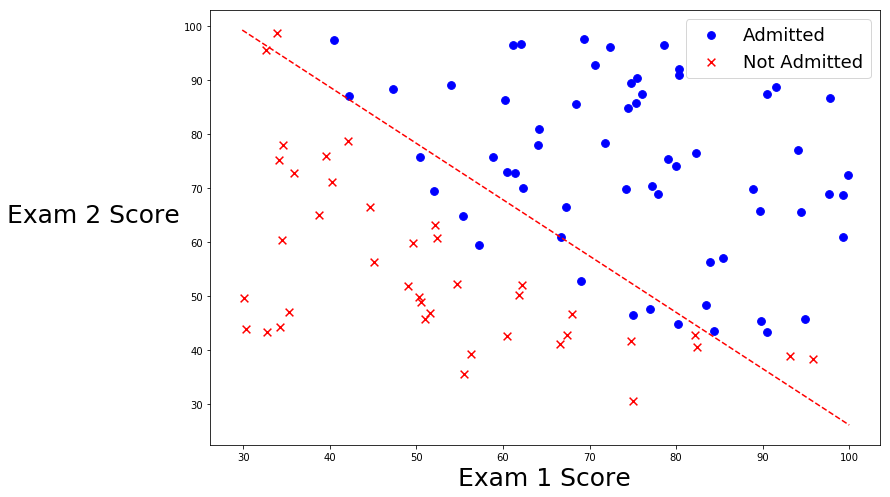

In [37]:
positive = data[data["Admitted"]==1]
negative = data[data["Admitted"]==0]

plt.figure(figsize = (12,8))
plt.scatter(positive['Exam1'], positive["Exam2"],
           s = 60, marker = "o", label = "Admitted",
           alpha = 1, c ="b")
plt.scatter(negative["Exam1"], negative["Exam2"],
           s = 60, marker = "x", label = "Not Admitted",
           alpha = 1, c = 'r')
plt.plot(x1_scaled, x2_scaled, "r--")
plt.xlabel("Exam 1 Score", fontsize = 25)
plt.ylabel("Exam 2 Score", rotation = 0, fontsize = 25,
          ha = "right")
plt.legend(fontsize = 18)

In [38]:
y_pred = np.array(predict(theta, X)).reshape(100,1)
acc = np.sum((y_pred == y).astype(np.int64))/len(y)
acc

0.89000000000000001

In [382]:
path = os.path.join(os.getcwd(), "data", "ex2data2.txt")
data2 = pd.read_csv(path, header = None, names = ["Test1",
                                                 "Test2",
                                                 "Accepted"])
pd.DataFrame(data2).head()

,Test1,Test2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [383]:
# degree = 2
# x1 = data2["Test1"]
# x2 = data2["Test2"]

# for i in range(1, degree):
#     for j in range(0, i):
#         data2['F' + str(i) + str(j)] = np.power(x1, i-j) * np.power(x2, j)

# data2.drop("Test1",axis = 1, inplace = True)
# data2.drop("Test2", axis = 1, inplace = True)

# data2.head()

# Accepted	F10
# 0	1	0.051267
# 1	1	-0.092742
# 2	1	-0.213710
# 3	1	-0.375000
# 4	1	-0.513250

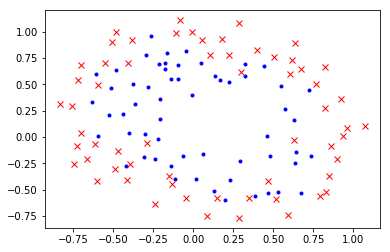

In [384]:
plt.plot(data2["Test1"][data2["Accepted"]==1], data2["Test2"][data2["Accepted"]==1], "b." )
plt.plot(data2["Test1"][data2["Accepted"]==0], data2["Test2"][data2["Accepted"]==0], "rx" )


# Manual Polynomial Features: 

In [385]:
degree = 2
x1 = data2["Test1"]
x2 = data2["Test2"]

for d1 in range(degree + 1):
    for d2 in range(degree + 1):
        data2["F" + str(d2) + str(d1)] = np.multiply(
            (x1**d2),(x2**d1))


data2.drop("Test1",axis = 1, inplace = True)
data2.drop("Test2", axis = 1, inplace = True)

data2.head()

,Accepted,F00,F10,F20,F01,F11,F21,F02,F12,F22
0,1,1.0,0.051267,0.002628,0.69956,0.035864,0.001839,0.489384,0.025089,0.001286
1,1,1.0,-0.092742,0.008601,0.68494,-0.063523,0.005891,0.469143,-0.043509,0.004035
2,1,1.0,-0.213710,0.045672,0.69225,-0.147941,0.031616,0.479210,-0.102412,0.021886
3,1,1.0,-0.375000,0.140625,0.50219,-0.188321,0.070620,0.252195,-0.094573,0.035465
4,1,1.0,-0.513250,0.263426,0.46564,-0.238990,0.122661,0.216821,-0.111283,0.057116


# Regularized Cost Function For Logistic Regression:   

#### $ -\frac{1}{m}\sum_{i=1}^m y^ilog(\frac{1}{1 + e^{\theta^T.x^i}}) - (1 - y^i)log(1 - \frac{1}{1 + e^{\theta^T.x^i}}) + \frac{\lambda}{2m}\sum_{j=1}^m \theta_j^2$

In [386]:
X = data2.iloc[:,1:].values
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8
0,1.0,0.051267,0.002628,0.69956,0.035864,0.001839,0.489384,0.025089,0.001286
1,1.0,-0.092742,0.008601,0.68494,-0.063523,0.005891,0.469143,-0.043509,0.004035
2,1.0,-0.213710,0.045672,0.69225,-0.147941,0.031616,0.479210,-0.102412,0.021886
3,1.0,-0.375000,0.140625,0.50219,-0.188321,0.070620,0.252195,-0.094573,0.035465
4,1.0,-0.513250,0.263426,0.46564,-0.238990,0.122661,0.216821,-0.111283,0.057116


In [387]:
y = data2.iloc[:,0].values.reshape(-1,1)
y.shape

(118, 1)

In [388]:
theta = np.zeros((1,9))
theta

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [389]:
sample = np.array([1,2,3]).reshape(1,3)
print(np.sum(sample**2))
sample[:,1:]

14


array([[2, 3]])

In [390]:
def RegCost(X, y, theta, lamb_da):
    m = len(X)
    z = X.dot(theta.T)
    g_z = sigmoid(z).reshape(-1,1)
    g_z.shape
    term1 = -y*(np.log(g_z))
    # pd.DataFrame(np.c_[term1,y]).sample(frac = 4/118, random_state = 65)
    term2 = (1 - y)*(np.log(1 - g_z))
    # pd.DataFrame(np.c_[term2,y]).sample(frac = 4/118, random_state = 65)
    reg_term = (lamb_da/(2*m))*np.sum(theta[:,1:]**2)
    # don't penalise theta_0
    cost = np.sum(term1 - term2)/m + reg_term
    return cost

In [391]:
def gradientDescent(X,y, theta, eta, iters, lamb_da):
    error_list = []
    m = len(X)
    for i in range(iters):
        # Calculate decision_scores 
        z = X.dot(theta.T)
        # >> (118,1) array of decision scores,
        # one for each instance.
        
        # Calcuate activation
        g_z = sigmoid(z)
        # >> (118,1) array of activation values, 
        # one for each instance. 
        
        # Calculate Cost
        error = RegCost(X, y, theta, lamb_da)
        # and append it to the list of errors 
        error_list.append(error)
        
        # Multiply error with each x_i^j 
        # ∑(y^ - y).x_j^i
        term = np.sum(np.multiply((g_z - y),X), axis = 0)
        # >> (3)
        
        # Weight Update
        theta = theta*(1 - eta*(lamb_da/m)) - (eta/m)*term
        
    return error_list, theta

In [392]:
X.shape, y.shape, theta.shape

((118, 9), (118, 1), (1, 9))

In [393]:
error_list, theta = gradientDescent(X, y, theta, eta = 0.1,
                                   iters = 1500, lamb_da = 7)


In [394]:
len(error_list)

1500

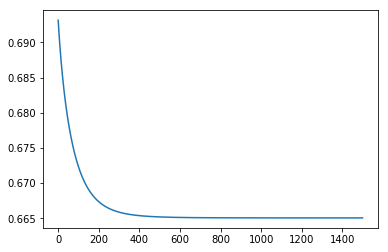

In [395]:
plt.plot(list(range(1500)), error_list)

In [396]:
theta

array([[ 0.20462848, -0.06174429, -0.62417043,  0.10242987, -0.16383683,
        -0.08978658, -0.4677037 , -0.08003176, -0.16521246]])

In [397]:
x1 = np.linspace(X[:,1].min(),X[:,1].max(), 100)
x0 = np.ones(len(x1))
x2 = np.linspace(X[:,2].min(),X[:,2].max(), 100)
x4 = np.linspace(X[:,4].min(),X[:,4].max(), 100)
x5 = np.linspace(X[:,5].min(),X[:,5].max(), 100) 
x6 = np.linspace(X[:,6].min(),X[:,6].max(), 100)
x7 = np.linspace(X[:,7].min(),X[:,7].max(), 100)
x8 = np.linspace(X[:,8].min(),X[:,8].max(), 100)

x3 = (- theta[0][0]*x0 - theta[0][1]*x1 - theta[0][2]*x2 - theta[0][4]*x4 - theta[0][5]*x5 - theta[0][6]*x6 - theta[0][7]*x7 - theta[0][8]*x8 )/theta[0][3]
x0.shape , x1.shape, x3.shape


((100,), (100,), (100,))

In [398]:
path = os.path.join(os.getcwd(), "data", "ex2data2.txt")
data2 = pd.read_csv(path, header = None, names = ["Test1",
                                                 "Test2",
                                                 "Accepted"])
pd.DataFrame(data2).head()

,Test1,Test2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


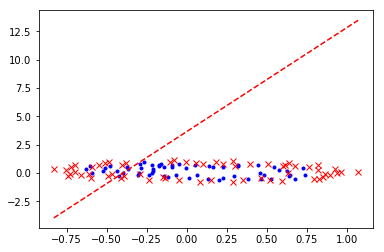

In [399]:
plt.plot(data2["Test1"][data2["Accepted"]==1], data2["Test2"][data2["Accepted"]==1], "b." )
plt.plot(data2["Test1"][data2["Accepted"]==0], data2["Test2"][data2["Accepted"]==0], "rx" )
plt.plot(x1, x3, "r--")

In [400]:
RegCost(X, y, theta, 2.5)

0.65186887293239615

In [401]:
def predict(theta, X):
    z  = X.dot(theta.T)
    g_z = sigmoid(z)
    pred = []
    for prob in g_z: 
        if prob >= 0.5:
            pred.append(1)
        else:
            pred.append(0)
    return (pred)

y_pred = np.array(predict(theta, X)).reshape(y.shape)
acc = np.sum((y_pred == y).astype(np.int64))/len(y)
acc

0.78813559322033899